## HW03 Code

## Student: Dipta Roy


You will complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/summer2021/cs135).

### Import required libraries.

In [56]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
import sklearn.calibration

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

### Function for later use
This function will compute and return a confusion matrix on data, given probabilistic predictions, and a threshold to use when converting probabilities to "firm" predictions.

***Don't change this function.***

In [2]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

## Cancer-Risk Screening

### 1: Compute true/false positives/negatives.

Complete the following code.

In [13]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    '''
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : int
        Number of true positives
    TN : int
        Number of true negatives
    FP : int
        Number of false positives
    FN : int
        Number of false negatives
    '''
    
    TP = 0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    
    for x in range(len(ytrue_N)):
        if (ytrue_N[x]==1 and yhat_N[x]==1):
            TP +=1 
        elif (ytrue_N[x]==0 and yhat_N[x]==0):
            TN +=1
        elif (ytrue_N[x]==0 and yhat_N[x]==1):
            FP +=1
        elif (ytrue_N[x]==1 and yhat_N[x]==0):
            FN+=1

    
    return TP, TN, FP, FN

#### Testing code
The following four calls to the function above test your results.  ***Don't modify this.***

In [14]:
all0 = np.zeros(10)
all1 = np.ones(10)
calc_TP_TN_FP_FN(all0, all1)

(0, 0.0, 10.0, 0.0)

In [15]:
calc_TP_TN_FP_FN(all1, all0)

(0, 0.0, 0.0, 10.0)

In [16]:
calc_TP_TN_FP_FN(all1, all1)

(10, 0.0, 0.0, 0.0)

In [17]:
calc_TP_TN_FP_FN(all0, all0)

(0, 10.0, 0.0, 0.0)

### Load the dataset.

The following should ***not*** be modified.  After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [10]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_cancer/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_cancer/y_test.csv', delimiter=',', skiprows=1)

### 2: Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [22]:
sum(y_train)/len(y_train)

0.14035087719298245

In [25]:
print("Fraction of data that has_cancer on TRAIN: %.3f" % (sum(y_train)/len(y_train))) #TODO: modify these prints
print("fraction of data that has_cancer on TEST : %.3f" % (sum(y_test)/len(y_test)))

Fraction of data that has_cancer on TRAIN: 0.140
fraction of data that has_cancer on TEST : 0.139


### 3: The predict-0-always baseline

#### (a) Compute the accuracy of the always-0 classifier.

Complete the code to compute and print the accuracy of the always-0 classifier on validation and test outputs.

In [143]:
def accuracy(TP, TN, FP, FN):
    acc = (TP + TN)/ (TP + TN + FP + FN)
    return acc

##Creating a helper function to make life easier
def find_accuracy(ytrue_N, yhat_N):
    tps = calc_TP_TN_FP_FN(ytrue_N, yhat_N)
    
    acc = accuracy(tps[0], tps[1], tps[2], tps[3])
    return acc


print("acc on TRAIN: %.3f" % find_accuracy(y_train, np.zeros(len(y_train)))) #TODO: modify these values
print("acc on TEST : %.3f" % find_accuracy(np.zeros(len(y_test)), y_test))

acc on TRAIN: 0.860
acc on TEST : 0.861


#### (b) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [50]:
# TODO: call print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, np.zeros(len(y_test))))

Predicted    0  1
True             
0          155  0
1           25  0


#### (c) Reflect on the accuracy of the always-0 classifier.

**Answer**: It makes sense that we have a high accuracy on the test and train because we have a big imbalance in our data. Only 13.9% of our testing dataset has cancer, meaning that 86.1% of our testing data doesn't. This is reflected in the accuracy of the testing set by using the always-0 classifier. We wouldn't use it for this task because our goal is to actually detect the cancer, so we want to minimize our false negative and increase our true positive. We wouldn't want to tell someone that they don't have cancer when they do becaues then they wouldn't get the help they need.

#### (d) Analyze the various costs of using the always-0 classifier.


**Answer**: 
False Positive: This mistake wouldn't be TOOO bad because though the patient doesn't actually have cancer they might seek out treatment and waste money that they necessarily didn't need. 

False Negative: This mistake would be dire as now the patient might not seek out treatment and would lose time in their fight for cancer. It can also increase cost as later stages of cancer might cost more to remove. They also will not be able to let their close friends and family know. 

I would recommend **NOT** using this classifier for this type of problem as the cost of this mistake would not be worth it and would cause more problems than solve.

### 4: Basic Perceptron Models

#### (a) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

In [59]:
from sklearn.linear_model import Perceptron

In [84]:
pct = Perceptron()
pct.fit(x_train, y_train)
y_test_predict = pct.predict(x_test)
y_train_predict = pct.predict(x_train)

ytrain_acc = pct.score(x_train, y_train)
ytest_acc = pct.score(x_test, y_test)

print("acc on TRAIN: %.3f" % ytrain_acc) #TODO: modify these values
print("acc on TEST : %.3f" % ytest_acc)

print(calc_confusion_matrix_for_threshold(y_test, y_test_predict))
# TODO: call print(calc_confusion_matrix_for_threshold(...))

acc on TRAIN: 0.860
acc on TEST : 0.861
Predicted    0  1
True             
0          155  0
1           25  0


Our accuracy didn't change so we need to use a scalar

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()
scaler.fit(x_train)
xtrain_scale = scaler.transform(x_train)
xtest_scale = scaler.transform(x_test)

pct2 = Perceptron()
pct2.fit(xtrain_scale, y_train)

ytest_scale_pred = pct2.predict(xtest_scale)
ytrain_scale_pred = pct2.predict(xtrain_scale)

ytest_scale_acc = pct.score(xtest_scale, y_test)
ytrain_scale_acc = pct.score(xtrain_scale, y_train)

print("acc on TRAIN: %.3f" % ytrain_scale_acc) #TODO: modify these values
print("acc on TEST : %.3f" % ytest_scale_acc)

print(calc_confusion_matrix_for_threshold(y_test, ytest_scale_pred))


acc on TRAIN: 0.698
acc on TEST : 0.706
Predicted   0   1
True             
0          64  91
1           0  25


#### (b) Compare the `Perceptron` to the always-0 classifier.

**Answer**: Though our accuracy is lower we have a better model than the always-0 classifier and that's because we were able to predict everyone that had cancer.


#### (c) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [88]:
train_accuracy_list = list()
test_accuracy_list = list()

alpha_set = np.logspace(-5, 5, base=10, num=100)

for i in alpha_set:
    tron = Perceptron(penalty='l2', alpha=i)
    tron.fit(xtrain_scale, y_train)
    
    ytest_sca = tron.predict(xtest_scale)
    ytrain_sca = tron.predict(xtrain_scale)
    
    train_accuracy_list.append(tron.score(xtrain_scale, y_train))
    test_accuracy_list.append(tron.score(xtest_scale, y_test))
    
    
# TODO: create, fit models here and record accuracy of each

##### Plot accuracy on train/test data across the different alpha values.

Text(0.5, 1.0, 'Accuracy Values for Test and Train data based on Alpha')

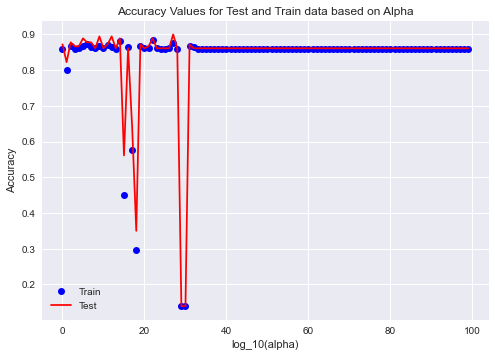

In [117]:
# TODO make plot
plt.plot(train_accuracy_list, 'bo', label='Train')
plt.plot(test_accuracy_list, 'r', label='Test')
plt.xlabel('log_10(alpha)');
plt.ylabel('Accuracy');
plt.legend();
plt.title('Accuracy Values for Test and Train data based on Alpha')

# TODO add legend, titles, etc.
# plt.legend(...);

#### (d) Discuss what the plot is showing you.

**Answer**: Accuracy stays fairly consistent and close to the 86% as we've seen before based on alpha values. There is also  closeness in accuracy in training/testing sets. Some drops in accuracy is observed with certain alpha values but it isn't a bad thing in this case as we've seen before we're not too concerned about the accuracy and more concerned about getting the cancer patients correct.

The Train/test data stays very close together since it is a binary classification

### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves. 

In [15]:
# TODO: fit a Perceptron and generate its decision_function() over the test data.

# TODO: Build a CalibratedClassifierCV, using a Perceptron as its base_estimator, 
#       and generate its probabilistic predictions over the test data.

In [119]:
dec = Perceptron()
dec.fit(xtrain_scale, y_train)
dec_pred = dec.decision_function(xtest_scale)

In [122]:
from sklearn.calibration import CalibratedClassifierCV

In [123]:
perc = Perceptron()
cv_pct = CalibratedClassifierCV(base_estimator= perc, method = 'isotonic')
cv_pct.fit(xtrain_scale, y_train)

CalibratedClassifierCV(base_estimator=Perceptron(), method='isotonic')

In [125]:
cv_pred = cv_pct.predict_proba(xtest_scale)

In [127]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [132]:
fpr1,tpr1,thresh1=roc_curve(y_test,cv_pred[:,1]) #CCCV
auc1=roc_auc_score(y_test,cv_pred[:,1])

fpr2, tpr2, thresh2 = roc_curve(y_test, ytest_scale_pred) #perceptron with scale
auc2=roc_auc_score(y_test,ytest_scale_pred)

fpr3, tpr3, thresh3 = roc_curve(y_test, y_test_predict) #perceptron without scale
auc3=roc_auc_score(y_test,y_test_predict)

fpr4, tpr4, thresh4 = roc_curve(y_test, dec_pred) #decision function perceptron
auc4=roc_auc_score(y_test,dec_pred)


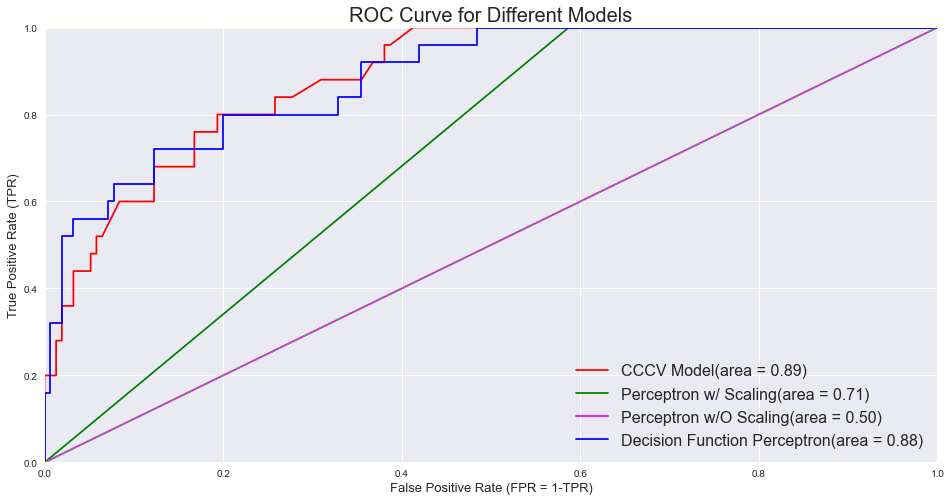

In [140]:
plt.figure(figsize = (16,8))
plt.plot(fpr1,tpr1, label='CCCV Model(area = %0.2f)' % auc1,color='red')
plt.plot(fpr2, tpr2, label='Perceptron w/ Scaling(area = %0.2f)' % auc2,color='green')
plt.plot(fpr3, tpr3, label='Perceptron w/O Scaling(area = %0.2f)' % auc3,color='magenta')
plt.plot(fpr4, tpr4, label='Decision Function Perceptron(area = %0.2f)' % auc4,color='blue')


plt.plot([0, 1], [0, 1], 'k--',color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR = 1-TPR)', fontsize=13)
plt.ylabel('True Positive Rate (TPR)', fontsize=13)
plt.title('ROC Curve for Different Models', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [141]:
print("AUC on TEST for Perceptron: %.3f" % auc4) #TODO: modify these values
print("AUC on TEST for probabilistic model: %.3f" % auc1)

AUC on TEST for Perceptron: 0.884
AUC on TEST for probabilistic model: 0.886


#### (b) Discuss the results above

**Answer**: The Probabilistic Model got a slightly higher AUC on test than the decision function. We can see on the ROC curve that they are also very similar as they follow almost the same pattern. They differ slightly in the FPR to TPR at some points in the graph. I would coose the CCCV model as it does have a better TPR and since in this case we want to be right about the true positives it's better to go with this model.

#### (c) Compute model metrics for different probabilistic thresholds

Complete the function that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

In [153]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    acc : accuracy of predictions
    tpr : true positive rate of predictions
    tnr : true negative rate of predictions
    ppv : positive predictive value of predictions
    npv : negative predictive value of predictions
    '''
    y_preds = []

    for x in yproba1_N:
        if x>=thresh:
            y_preds.append(1)
        else:
            y_preds.append(0)
            
    TP, TN, FP, FN = calc_TP_TN_FP_FN(ytrue_N, y_preds)
    
    # TODO: fix this
    acc = find_accuracy(ytrue_N, y_preds)
    tpr = (TP)/(TP+FN)
    tnr = (TN)/(TN+FP)
    
    ppv = 0
    if (TP+FP ==0): 
        ppv= 0 
    else: 
        ppv = (TP)/(TP+FP)
        
    npv = 0
    if (TN + FN==0):
        npv = 0
    else:
        npv = (TN)/(TN + FN)
    
    return acc, tpr, tnr, ppv, npv

# You can use this function later to make printing results easier; don't change it.
def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true postive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [155]:
# TODO: test different thresholds to compute these values
best_TPR = 0
best_PPV_for_best_TPR = 0
best_TPR_threshold = 0

best_PPV = 0
best_TPR_for_best_PPV = 0  
best_PPV_threshold = 0

thresholds = np.linspace(0, 1.001, 51)
for i in thresholds:
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(y_test, cv_pred[:,1], i)
    
    if tpr > best_TPR:
        best_TPR = tpr
        best_PPV_for_best_TPR = ppv
        best_TPR_threshold = i
    
    if ppv> best_PPV:
        best_PPV = ppv
        best_TPR_for_best_PPV = tpr  
        best_PPV_threshold = i

In [156]:
print("TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

TPR threshold: 0.0000 => TPR: 1.0000; PPV: 0.1389
PPV threshold: 0.6206 => PPV: 1.0000; TPR: 0.2000


#### (e) Exploring diffrerent thresholds

#### (i) Using default 0.5 threshold. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [159]:
best_thr = 0.5
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print(calc_confusion_matrix_for_threshold(y_test, cv_pred[:,1], best_thr))
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_perf_metrics_for_threshold(y_test, cv_pred[:,1], best_thr))
# TODO: print_perf_metrics_for_threshold(...)

ON THE TEST SET:
Chosen best threshold = 0.5000
Predicted    0   1
True              
0          150   5
1           15  10
(0.8888888888888888, 0.4, 0.967741935483871, 0.6666666666666666, 0.9090909090909091)


#### (ii) Using threshold with highest TPR. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [160]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print(calc_confusion_matrix_for_threshold(y_test, cv_pred[:,1], best_thr))
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_perf_metrics_for_threshold(y_test, cv_pred[:,1], best_thr))
# TODO: print_perf_metrics_for_threshold(...)

ON THE TEST SET:
Chosen best threshold = 0.0000
Predicted  0    1
True             
0          0  155
1          0   25
(0.1388888888888889, 1.0, 0.0, 0.1388888888888889, 0)


#### (iii) Using threshold with highest PPV. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [161]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print(calc_confusion_matrix_for_threshold(y_test, cv_pred[:,1], best_thr))
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_perf_metrics_for_threshold(y_test, cv_pred[:,1], best_thr))
# TODO: print_perf_metrics_for_threshold(...)

ON THE TEST SET:
Chosen best threshold = 0.6206
Predicted    0  1
True             
0          155  0
1           20  5
(0.8888888888888888, 0.2, 1.0, 1.0, 0.8857142857142857)


#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

**Answer**: 
If we chose **threshold 0.5**: we'd be wrong on 15 of those people that actually had the cancer. Which isn't good, and this would lead to lost time that the patient could have gotten help.

If we chose **threshold: 0.00**: everyone would have to get biopsies and this would be really expensive for the people that might not have insurance and are getting the biopsies for no reason. It would be great for the hospital though, since more revenue!

If we chose **threshold 0.62**: we'd be wrong for a lot of people and again they'd lose the time that they could've gotten help.